## Coach Lab Linear Regression

### Objectives
*Put together a linear regression model <br>
*Understand the steps in modeling<br>
*Evaluate linear regression model


![caption](images/Model_Process_Part1.png)
![caption](images/Model_Process_Part2.png)

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score, train_test_split

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

#### For this lesson we will use the computer hardware dataset from https://www.mldata.io/dataset-details/computer_hardware/

In [2]:
comp = pd.read_csv('data/computer_hardware_dataset.csv')

### Project Question Formulation


What do we want to evaluate/explore/answer????

In [3]:
comp.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [4]:
comp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209 entries, 0 to 208
Data columns (total 10 columns):
vendor_name    209 non-null object
model_name     209 non-null object
MYCT           209 non-null int64
MMIN           209 non-null int64
MMAX           209 non-null int64
CACH           209 non-null int64
CHMIN          209 non-null int64
CHMAX          209 non-null int64
PRP            209 non-null int64
ERP            209 non-null int64
dtypes: int64(8), object(2)
memory usage: 16.5+ KB


In [5]:
comp.describe().T

,count,mean,std,min,25%,50%,75%,max
MYCT,209.0,203.822967,260.262926,17.0,50.0,110.0,225.0,1500.0
MMIN,209.0,2867.980861,3878.742758,64.0,768.0,2000.0,4000.0,32000.0
MMAX,209.0,11796.153110,11726.564377,64.0,4000.0,8000.0,16000.0,64000.0
CACH,209.0,25.205742,40.628722,0.0,0.0,8.0,32.0,256.0
CHMIN,209.0,4.698565,6.816274,0.0,1.0,2.0,6.0,52.0
CHMAX,209.0,18.267943,25.997318,0.0,5.0,8.0,24.0,176.0
PRP,209.0,105.622010,160.830733,6.0,27.0,50.0,113.0,1150.0
ERP,209.0,99.330144,154.757102,15.0,28.0,45.0,101.0,1238.0


In [6]:
comp.head()

,vendor_name,model_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


### Step 1 Train/test Split
#### Target is PRP

In [7]:
# create y and X as the target and the features
y = comp['PRP']  # Target variable
X = comp.drop(columns=['PRP'])  # Features. Everything but our target var.

In [8]:
#split data into test and train sets

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42, test_size = .25)

In [9]:
#get shape of the training and test sets
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((156, 9), (156,), (53, 9), (53,))

### Step 2- Exploratory Data Analysis 

We will use only the training data for this part

#### As a first step in data cleaning lets look for missing values

In [10]:
# Checking for missing values
X_train.isna().sum()
X_train.isnull().sum()

vendor_name    0
model_name     0
MYCT           0
MMIN           0
MMAX           0
CACH           0
CHMIN          0
CHMAX          0
ERP            0
dtype: int64

In [11]:
# Return unique values for vendo_name and model_name
print(len(X_train.vendor_name.unique()))
print(len(X_train.model_name.unique()))

29
156


In [12]:
# Dropping columns
def drop_columns(df, col_name):
    df = df.drop(columns=[col_name])
    return df

In [13]:
X_train = drop_columns(X_train, "model_name")

In [14]:
X_train.head()

,vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,ERP
29,c.r.d,320,256,5000,4,1,6,27
19,burroughs,110,5000,5000,142,8,64,124
135,magnuson,50,2000,16000,24,6,16,88
139,nas,115,2000,4000,2,1,5,29
66,hp,90,256,1000,0,3,10,18


#### Next let's look at the distribution of our variables

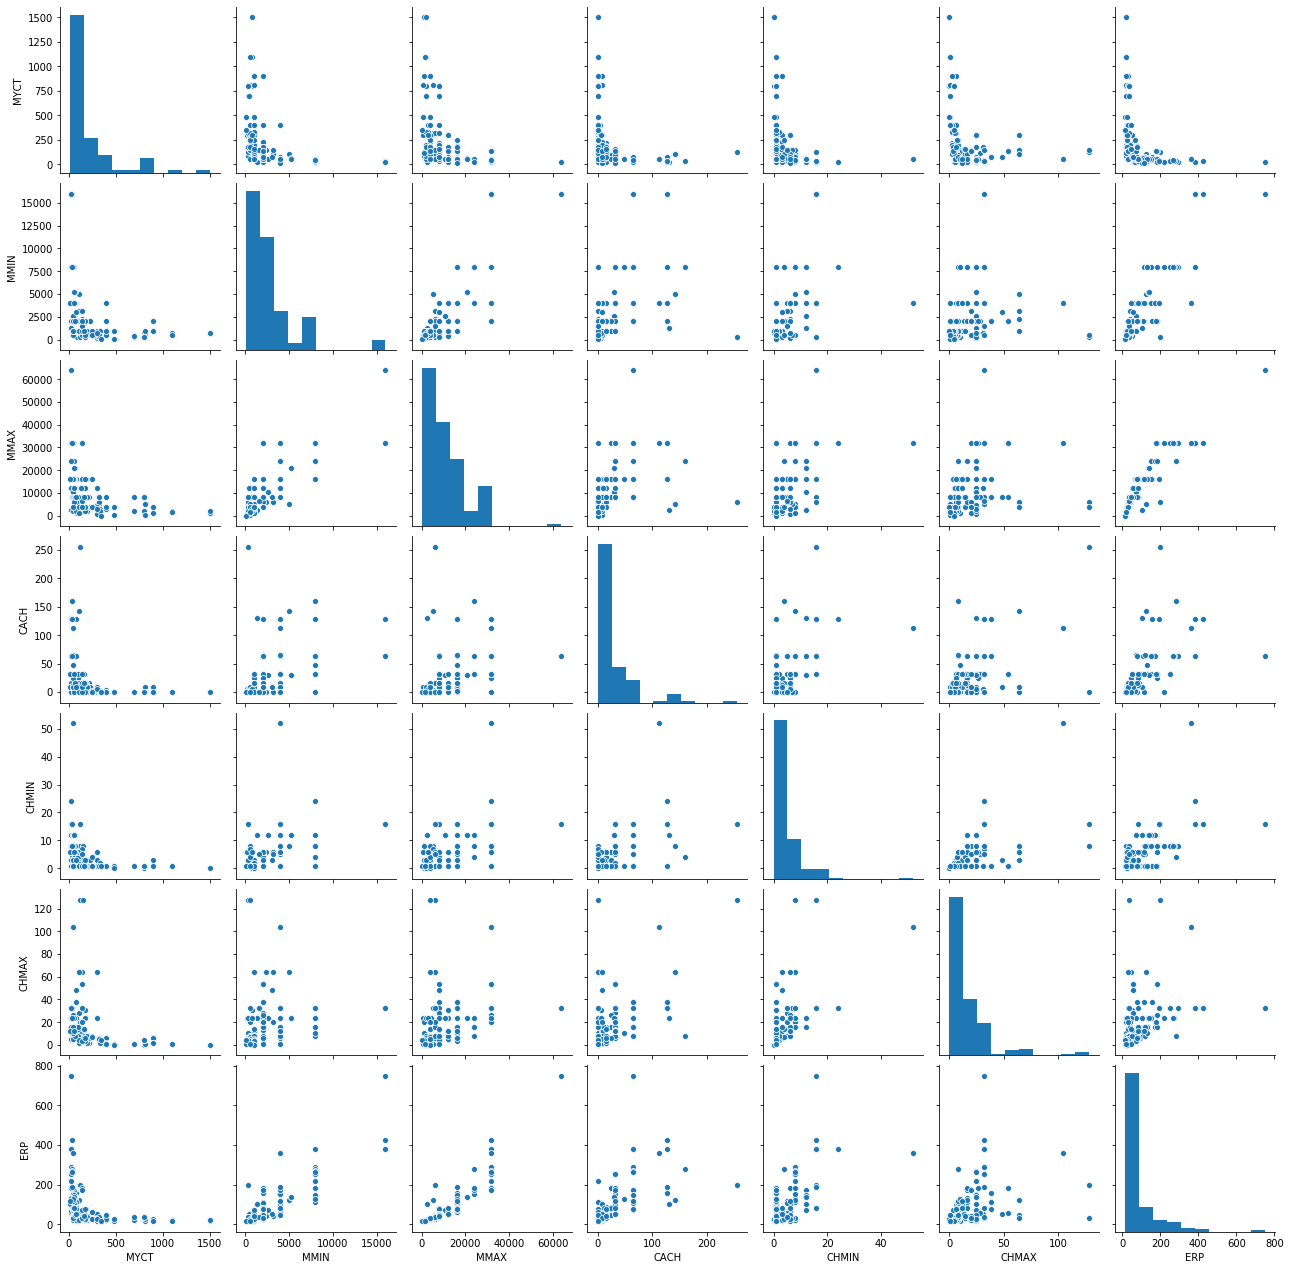

In [15]:
#create scatterplot matrix
sns.pairplot(X_train)

#### Next let's look at the distribution of our target

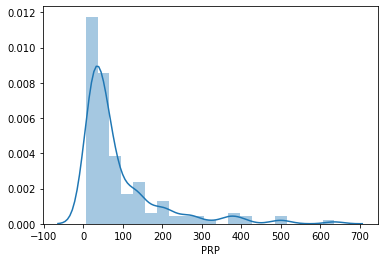

In [16]:
#histogram of y_train
sns.distplot(y_train)

#### Do we have any categorical variables we need to encode?

In [17]:
# Transforming data to log because we want the data to have low bias
X_train_log = pd.concat([X_train.loc[:,'vendor_name'], X_train.loc[:,'CACH':'CHMAX'], X_train.loc[:, 'MYCT':'MMAX'].applymap(np.log).add_suffix('_log')], axis=1)
X_train_log.head()

,vendor_name,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,c.r.d,4,1,6,5.768321,5.545177,8.517193
19,burroughs,142,8,64,4.700480,8.517193,8.517193
135,magnuson,24,6,16,3.912023,7.600902,9.680344
139,nas,2,1,5,4.744932,7.600902,8.294050
66,hp,0,3,10,4.499810,5.545177,6.907755


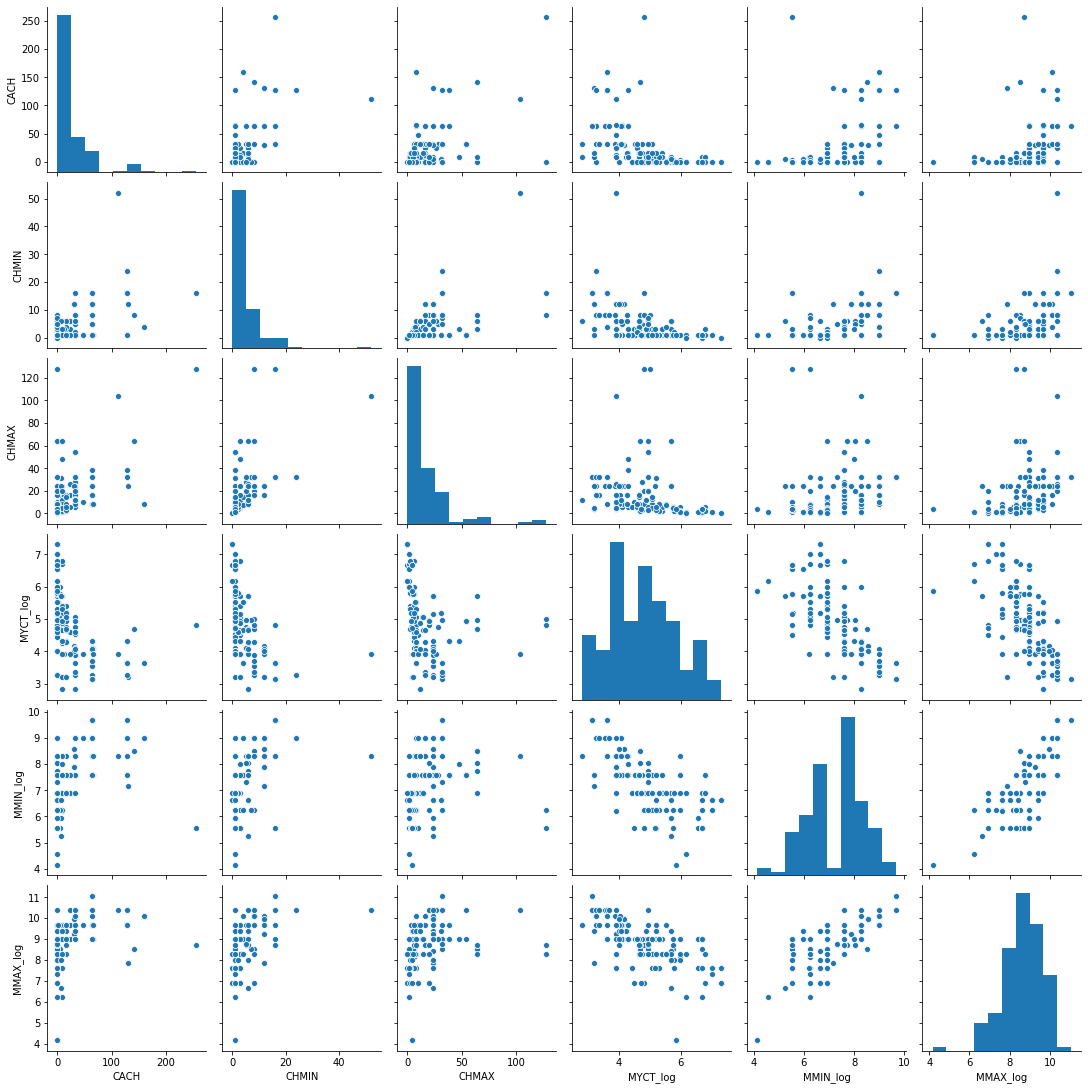

In [18]:
sns.pairplot(X_train_log)

In [19]:
# There are strings in our features. We need to convert them into ints
from sklearn.preprocessing import OneHotEncoder

# Instance
ohe = OneHotEncoder()

vendor_matrix = ohe.fit_transform(X_train_log.vendor_name.values.reshape((-1, 1))).toarray()

In [20]:
X_train_log = X_train_log.drop("vendor_name", axis=1)  # Dropped because it is redundant

In [21]:
X_train_log.head()

,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log
29,4,1,6,5.768321,5.545177,8.517193
19,142,8,64,4.700480,8.517193,8.517193
135,24,6,16,3.912023,7.600902,9.680344
139,2,1,5,4.744932,7.600902,8.294050
66,0,3,10,4.499810,5.545177,6.907755


In [22]:
X_train_log.reset_index(drop=True, inplace=True)  # Fixing index. Recallibrate

In [23]:
vendor_df = pd.DataFrame(vendor_matrix)

In [24]:
X_train_log = X_train_log.join(vendor_df)  # Joining the encode for vendor into our training dataframe
X_train_log.head()

,CACH,CHMIN,CHMAX,MYCT_log,MMIN_log,MMAX_log,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28
0,4,1,6,5.768321,5.545177,8.517193,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,142,8,64,4.700480,8.517193,8.517193,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,24,6,16,3.912023,7.600902,9.680344,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2,1,5,4.744932,7.600902,8.294050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,3,10,4.499810,5.545177,6.907755,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Next let's scale our data

Why do we do this?  What does it mean about the comparability of our variables?  What about interpretation of coefficients?

In [25]:
"""
Scalng data because there is a lot of continous variables
"""

'\nScalng data because there is a lot of continous variables\n'

### Step 4 - Messy Model

#### First let's use statsmodels

In [26]:
#Linear regression using statsmodels
results = sm.OLS(list(y_train), X_train_log).fit()

#### Now let's use sklearn

In [27]:
#initialize a linear regression model in sklearn
lr = LinearRegression()

In [28]:
#fit linear model to training data
lr.fit(X_train_log, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
results.summary()  # A lot of info. Good info.
lr.score(X_train_log, y_train)  # Returns R^2 - Residuals

0.8115493337126586

### Step 5 - Model Evaluation

In [ ]:
#get summary statistics from statsmodels


In [ ]:
#get r squared value from sklearn


In [ ]:
#create formula for adjusted r squared
def adjusted_r_suared(r_squared, num_samples, num_regressors):
    return 1 - ((1-r_squared)*(num_samples - 1) / (num_samples - num_regressors - 1))

In [ ]:
#calculate adjusted r squared
adjusted_r_suared()

#### What does the r-squared value mean? What do the r-squared values tell us about the fit of our model?  What about adjusted r-squared?

#### Now let's look at predictions of relative performance to compare to actual relative performance

In [ ]:
linreg_results_df = pd.DataFrame(linreg.predict(X_train), y_train).reset_index()

In [ ]:
linreg_results_df.columns = ['Actual_Price', 'Predicted_Price']

In [ ]:
linreg_results_df.head()

## Let's use regularization to see if that helps our model fit

In [41]:
#importing Lasso and Ridge models from sklearn
from sklearn.linear_model import Lasso, Ridge

### Lasso Regularizer

In [42]:
#conduct lasso regression on training data
lasso = Lasso()

In [43]:
#Evaluation of lasso on training data
lasso.fit(X_train_log, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)

In [47]:
#examine coefficients from lasso
lasso.score(X_train_log, y_train)

0.7654812759895623

### Ridge Regularizer

In [48]:
#conduct ridge regression on training data
ridge = Ridge()

In [49]:
#Evaluation of ridge on training data
ridge.fit(X_train_log, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [50]:
#examine coefficients from ridge
ridge.score(X_train_log, y_train)

0.8075281212631489

### Step 6 - Best Model Evaluation

In [ ]:
#apply data cleaning process to test set

In [ ]:
#run best model on test set

### Step 7 - Model Interpretation

What take-ways do we have?  Conclusions about our initial question?  Who would care?  Why do they care?